# Lecture 4. Multiple  Linear Regresssion
--- 

### CS 109A/AC 209A/STAT 121A Data Science:
### Harvard University
Fall 2016 <br>
Instructors:  P. Protopapas, K. Rader, W. Pan




## Announcements 

- Lectures will be held in Emerson Hall, Room 105
- HW0: You should have received simple test comments. Please check it out.  
- HW1: Grading is almost done. Grades should be out by Thursday 
- HW2: will be posted on Wed **after** the lecture 
- Projects: 
    - List of projects are posted
    - Canvas Project Page has: guideline, project descriptions, form to fill
    - Deadline for milestone 1 (choose project and form a group)  is being pushed back to next wednesday (28th) 



<br>

# Outline 
- Review of last lecture
- Multiple Regression
    - Estimating the regression coefficients
    - Relationship Between the Response and Predictors: F-statistics 
    - Important Variables: Information Criteria
    - Model Fit
    - Prediction 
- Extensions of the Linear Model
    - Interaction Terms 
   

    


In [1085]:
import sys
import time
print("QUIZ TIME")
for i in range(5*1,0,-1):
    #time.sleep(10)
    sys.stdout.write(str(i)+' ')
    sys.stdout.flush() 


QUIZ TIME
5 4 3 2 1 

<br>

# Outline 
- ** Review of last lecture ** 
- Multiple Regression
    - Estimating the regression coefficients
    - Relationship Between the Response and Predictors: F-statistics 
    - Important Variables: Information Criteria
    - Model Fit
    - Prediction 
- Extensions of the Linear Model
    - Interaction Terms 
   

    


In [1086]:
from ipywidgets import interact,  FloatSlider, RadioButtons
import numpy as np 
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression as Lin_Reg

import statsmodels.api as sm

    
from mpl_toolkits.mplot3d import Axes3D

In [1087]:
## GENERATE ANOTHER DATASET AND EXAMINE RESIDUALS 
def GenerateDataLinearFun(N=1000, beta0=2.2, beta1=3.0, sigma=10.0,  Xmax=90.0):
    epsilon=np.random.normal(0,sigma,N)  # Random normally distributed points 
    X = np.linspace(Xmin,Xmax, N)           
    Y = beta0 + beta1 * X + epsilon 
    return X, Y 
    
def GenerateDataNotLinearFun(N=1000, beta0=2.2, beta1=3.0, sigma=1.0, Xmax=1.0, alpha=1):
    epsilon=np.random.normal(0,sigma,N)  # Random normally distributed points 
    X = np.linspace(0,Xmax, N)           
    Y = beta0 + beta1 * X + alpha* np.sin(6*X)+ epsilon 
    #Y =  beta0 + beta1 * X +4*beta1*(X>0.5) + epsilon 
    #Y =  beta0 + beta1 * X + alpha * X*X*X + epsilon
    return X, Y 

def FitLinearModel(X,Y):
    # Estimate the coefficients 
    beta1 =  np.sum((X-np.mean(X)) * (Y-np.mean(Y)))/np.sum( (X-np.mean(X))**2)
    beta0 = np.mean(Y) - beta1*np.mean(X)  
    return beta0, beta1

def PredictLinearModel(X, beta0, beta1):
    Y = beta0 + beta1 * X 
    return Y

def RSS(Y, beta0, beta1):
    return np.sum( (Y-PredictLinearModel(X, beta0, beta1))**2)

In [1088]:
#  IMPORT DATA 
data = pd.read_csv('maxheartrate.csv')
X=data['age'].values
Y=data['maxheartrate'].values

In [1089]:
font = {'family' : 'serif',
        'weight' : 'bold',
        'size'   : 22}

matplotlib.rc('font', **font)

In [1090]:
def plotit():
    plt.figure(figsize=(15,10)) 
    plt.plot(X,Y, 'ro', label='Data', markersize=20)
    plt.xlabel('Age'); plt.ylabel('Max Hear Rate')
    plt.title('Max Heart Rate for Males')
    plt.grid()

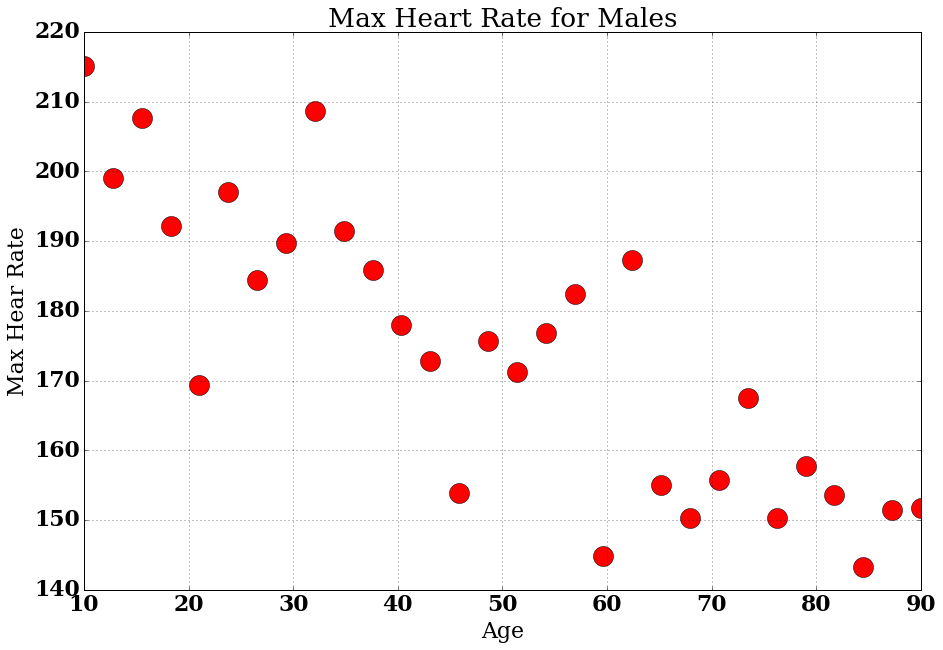

In [1091]:
plotit()

In [1092]:
def plotit(beta0, beta1,fit):
    print(X.shape, Y.shape)
    plt.figure(figsize=(15,10)) 
    plt.plot(X,Y, 'ro', label='Data', markersize=20)
    plt.xlabel('Age'); plt.ylabel('Max Hear Rate')
    plt.title('Max Heart Rate for Males')
    plt.grid()
    plt.plot([X,X],[Y, beta0+beta1*X] , 'k')
    plt.plot(X, beta0+beta1*X, 'b', label="RSS="+str(np.around(RSS(Y, beta0, beta1), decimals=2)))
    beta0_hat, beta1_hat = FitLinearModel(X,Y)
    if fit==True:
        plt.plot(X,beta0_hat+beta1_hat*X, 'g' , label=r'$\hat{\beta}_0=$'+str(np.around(beta0_hat,decimals=1))
                 +r' $\hat{\beta}_1=$'+str(np.around(beta1_hat, decimals=1)))
    plt.legend()

(30,) (30,)


<function __main__.plotit>

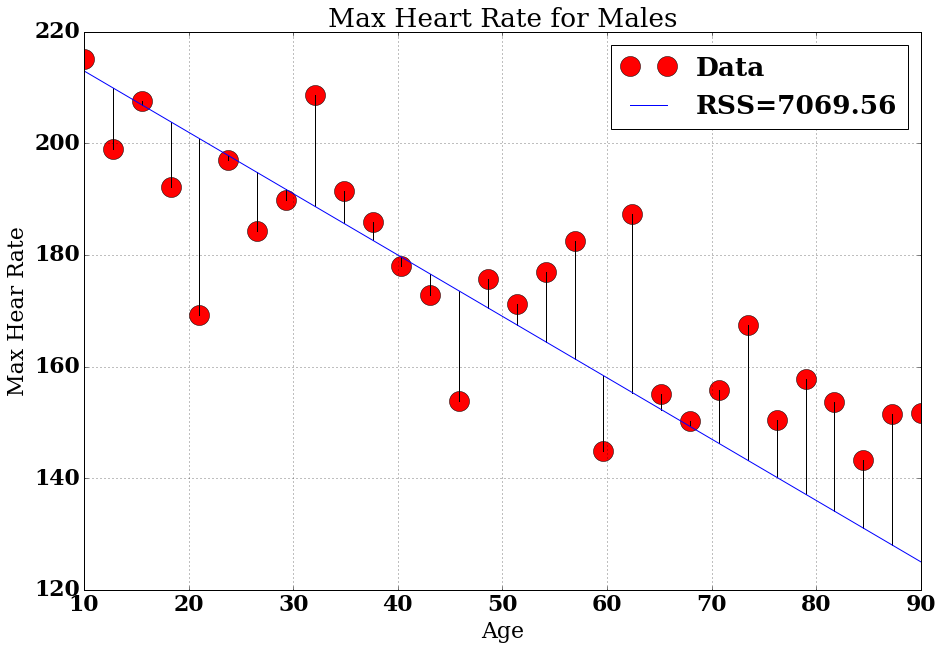

In [1093]:
interact(plotit, beta0=(200, 250, 2), beta1=(-1.5,-0.5,.1), fit=False)



<br>
## Review: Calculate coefficients
The most common approach involves minimizing least squares (sum of the square errors)

$$RSS   = \sum_i \,e_i^2= \sum_i ( y_i - \hat{y_i} )^2$$

The following minimize the RSS

$$\hat{\beta_1} = \frac{\sum_i(x_i-\bar{x})(y_i-\bar{y})}{\sum_i (x_i-\bar{x})^2 }$$

$$ \hat{\beta_0} = \bar{y} - \hat{\beta_1} \bar{x}$$

where $\bar{y} = \frac{1}{n} \sum_i y_i$ and  $\bar{x} = \frac{1}{n} \sum_i x_i$ are the sample means.



## Gradient Decent

Also known as steepest descent 

<img src="Gradient_descent.svg.png">


Note: More on this during Lab <br>
Good reads: <br>
http://www.bogotobogo.com/python/python_numpy_batch_gradient_descent_algorithm.php <br>
http://www.scipy-lectures.org/advanced/mathematical_optimization/

## Review: SE and Confidence Intervals 





The standard errors associated with $\hat{\beta}_0$ and $\hat{\beta}_1$:
$$SE(\hat{\beta}_0)^2 = \sigma^2 \left[ \frac{1}{n} + \frac{\bar{x}^2}{\sum_i(x_i-\bar{x})^2} \right]$$

$$SE(\hat{\beta}_1)^2 =  \frac{ \sigma^2}{\sum_i(x_i-\bar{x})^2}$$


$$\sigma \approx RSE = \sqrt{ \frac{RSS}{n-2}} $$

$$RSS  = \sum_i ( y_i - \hat{y_i} )^2 = \sum_i \,e_i^2$$




In [1094]:
def plotit(alpha):
    font = {'family' : 'monospace',
        'weight' : 'normal',
        'size'   : 14}

    matplotlib.rc('font', **font)
    plt.figure(figsize=(14,6)) 

    beta1=1.02
    SE = 0.4
    X=np.random.normal(beta1, SE, 1000)
    hf, bh=np.histogram(X, bins=20) #, alpha=0.8, bins =20, color='w');
    plt.step(bh[1:],  hf)
    plt.xlabel(r'$\beta_1$')
    plt.axvline(x=np.mean(X), color='r', linestyle='-', label='Estiamed value')
    plt.axvline(x=0, color='g', linestyle='-', label='Hypothesis testing')
    #plt.show()
    plt.hist(X[(X< bh[np.argmax(beta1+alpha*SE <  bh)]) * (X> bh[np.argmax(beta1-alpha*SE <  bh)])], color='k', alpha=0.3, bins =bh, label='95% confidence');
    plt.legend(loc='best')


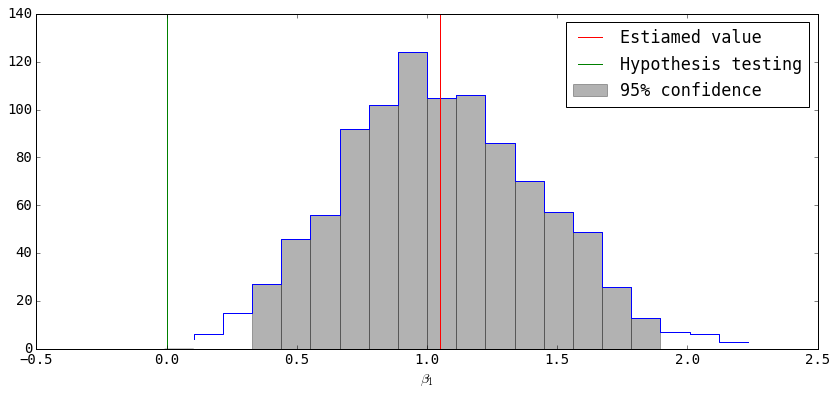

In [1095]:
plotit(2)



## Review: Model accuracy/goodness of fit and $R^2$ 

$$ RSE = \sqrt{ \frac{RSS}{n-2}} $$

- It is considered a measure of the lack of fit of the model
- Absolute measure since it is in units of Y 

Alternatively we can use $R^2$ statistics that is propotion of deviation in units of variance 


$$R^2 = \frac{TSS-RSS}{TSS} =  1 - \frac{RSS}{TSS} $$

where $TSS = \sum_i (y_i-\bar{y})^2 $ is the total sum of squares, or the deviation of Y before we regress and RSS is the deviation left after the regression. 

The ration tells as how well the regression performed to remove deviations on Y

 <br>
# Outline 

- Review of last lecture
- ** Multiple Regression ** 
    - Estimating the regression coefficients 
    - Relationship Between the Response and Predictors: F-statistics 
    - Important Variables: Information Criteria
    - Model Fit
    - Prediction 
- Extensions of the Linear Model
    - Interaction Terms 

    


# Linear Regression and Beyond 
So far we saw single predictor regression but usually we have more complex models, models with several predictors. 

For those we need to consider all predictor simultaneously, or **multiple regression ** 

We will see the difference from single regression and interpretation 

We will revisit everything we did before: 
    - How to estimate the coefficients
    - Relationship between response and predictors 
    - Model fit and prediction 

But also
    - Which predictors are important 
    - Extending beyond linearity more 


## Motivational Example:

Systolic blood pressure

In this dataset we have for 120 individuals:
 - systolic blood pressure (response variable) 
 - weight in pounds
 - height in inches 
 - age in years
 - gender




Sample questions: 

- Does age affect the blood pressure?
- Does weight affect the blood pressure?
- Does height affect the blood pressure?
- Does the height affect the weight and therefore the blood pressure? 
- How do we determine which predictors are important?


We will answer all these questions and more. 

Run three independent single linear regression models 

In [1096]:
#  IMPORT DATA 
data = pd.read_csv('bloodpressure_males.csv')
age=data['age'].values
weight=data['weight'].values
height=data['height'].values
blood=data['bloodpressure'].values

In [1097]:
def plotit(fit):
    font = {'family' : 'monospace',
        'weight' : 'normal',
        'size'   : 12}

    matplotlib.rc('font', **font)
    plt.figure(figsize=(8,6)) 

    fig, ((ax1, ax2, ax3)) = plt.subplots(1, 3, figsize=(15, 5))
    ax1.plot(age, blood, 'bo')
    ax1.set_xlabel('age [yeas]'); ax1.set_ylabel('Systolic Pressure')
    ax2.plot(height, blood, 'bo')
    ax2.set_xlabel('height [inches]'); ax1.set_ylabel('Systolic Pressure')
    ax3.plot(weight, blood, 'bo')
    ax3.set_xlabel('weight [lb]'); ax1.set_ylabel('Systolic Pressure')
    if fit==True:
        beta0_hat, beta1_hat = FitLinearModel(age, blood)
        ax1.plot(age, beta0_hat+ beta1_hat*age, 'r', label=r'$\hat{\beta}_0=$'+str(np.around(beta0_hat, decimals=1))
                     +r' $\hat{\beta}_1=$'+str(np.around(beta1_hat, decimals=1)))
        ax1.legend(loc='best')
    if fit==True:
        beta0_hat, beta1_hat = FitLinearModel(height, blood)
        ax2.plot(height, beta0_hat+ beta1_hat*height, 'r', label=r'$\hat{\beta_0}=$'+str(np.around(beta0_hat, decimals=1))
                     +r' $\hat{\beta}_1=$'+str(np.around(beta1_hat, decimals=1)))
        ax2.legend(loc='best')
    if fit==True:
        beta0_hat, beta1_hat = FitLinearModel(weight, blood)
        ax3.plot(weight, beta0_hat+ beta1_hat*weight, 'r', label=r'$\hat{\beta}_0=$'+str(np.around(beta0_hat, decimals=1))
                     +r' $\hat{\beta}_1=$'+str(np.around(beta1_hat, decimals=1)))
        ax3.legend(loc='best')

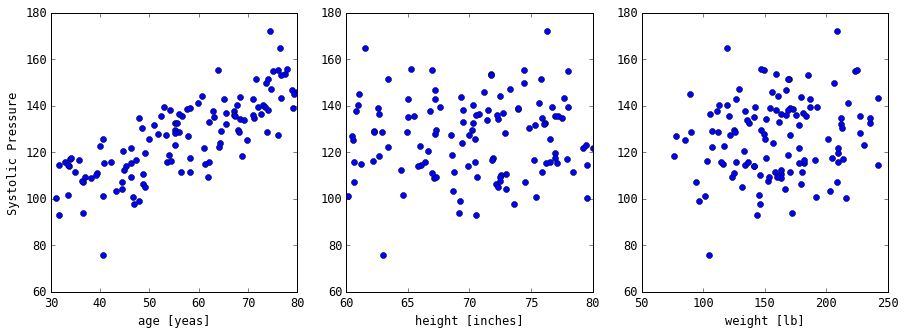

In [1098]:
interact( plotit, fit=False);

In [1099]:
# add constant for the intercept to work 
heightc = sm.add_constant(height)
weightc =  sm.add_constant(weight)
agec = sm.add_constant(age)

# fit three models
olsa = sm.OLS(  blood , agec)
olsa_result = olsa.fit()

olsh = sm.OLS(  blood, heightc)
olsh_result = olsh.fit()

olsw = sm.OLS(  blood, weightc)
olsw_result = olsw.fit()


In [1100]:
print(olsa_result.summary())
print(olsw_result.summary())

print(olsh_result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.613
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     187.0
Date:                Mon, 19 Sep 2016   Prob (F-statistic):           4.36e-26
Time:                        12:45:37   Log-Likelihood:                -451.25
No. Observations:                 120   AIC:                             906.5
Df Residuals:                     118   BIC:                             912.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         73.4840      3.991     18.411      0.0

#### Age:
|     |     Coefficient     |  SE |  p-value | 
|----------|:-------------:|:------:|:------: | 
| $\beta_0$ |   79.871  | 3.982 |  <0.000 
| $\beta_1$ |   0.800   |   0.069 | <0.000     | 


#### Height:
|     |     Coefficient     |  SE |  p-value | 
|----------|:-------------:|:------:|:------: | 
| $\beta_0$ |  100.6361     |  17.416  |  <0.000 
| $\beta_1$ |     0.3458      |     0.247  | 0.064       | 

#### Weight:
|     |     Coefficient     |  SE |  p-value | 
|----------|:-------------:|:------:|:------: | 
| $\beta_0$ | 114.002 | 6.417 |  <0.000 
| $\beta_1$ |    0.068   |   0.039  | <0.000     | 


In [1106]:
def plotit3d():
    xx1, xx2 = np.meshgrid(np.linspace(age.min(), age.max(), 100), 
                           np.linspace(weight.min(), weight.max(), 100))
    Z = 56 + 0.8 * xx1 + .15 * xx2
    # create matplotlib 3d axes
    fig = plt.figure(figsize=(12, 8))
    ax = Axes3D(fig, azim=-115, elev=15)


    resid = blood-( 56+0.8*age+0.15*weight)
    # plot hyperplane
    surf = ax.plot_surface(xx1, xx2, Z, alpha=0.3, linewidth=0)
    ax.scatter(age[resid>0], weight[resid>0], blood[resid>0], color='black', alpha=1.0, facecolor='white')
    ax.scatter(age[resid<0], weight[resid<0], blood[resid<0], color='white', alpha=1.0, facecolor='white')

    ax.set_xlabel('age [year]')
    ax.set_ylabel('weight [lb]')
    ax.set_zlabel('Blood Pressure')



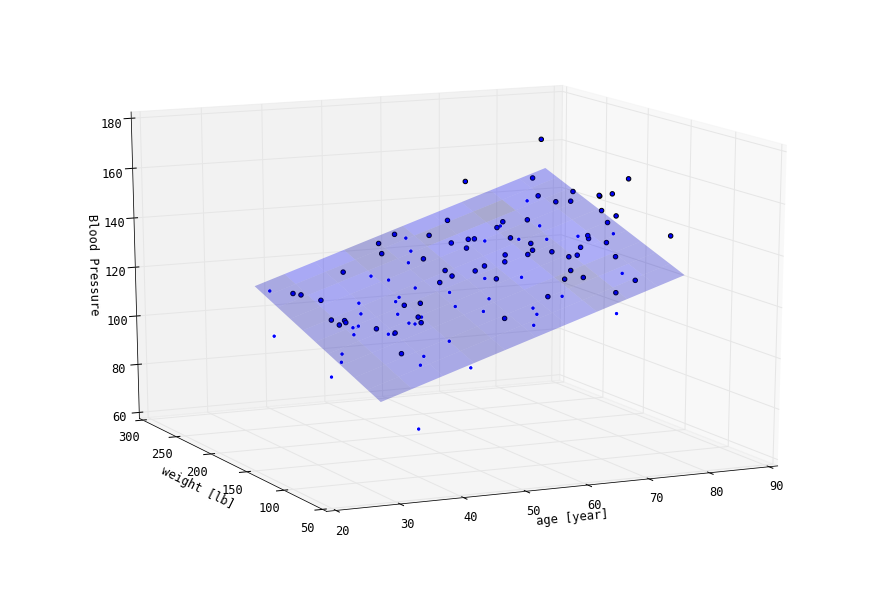

In [1107]:
plotit3d()

 <br>
# Outline 

- Review of last lecture
-  Multiple Regression 
    - ** Estimating the regression coefficients ** 
    - Relationship Between the Response and Predictors: F-statistics 
    - Important Variables: Information Criteria
    - Model Fit
    - Prediction 
- Extensions of the Linear Model
    - Interaction Terms 

    


## Fit a linear regression model with three predictors

$$ \hat{y} = \hat{\beta}_0+\hat{\beta}_1 \, x_1+ \hat{\beta}_2 \, x_2 + \ldots + \hat{\beta}_p \, x_p + \epsilon$$ 


Estimate the coefficients: 
$$
{\bf Y} = \left( \begin{array}{c}
Y_1  \\
Y_2  \\
\vdots \\
Y_n  \end{array} \right)$$

$$
{\bf X} = \left( \begin{array}{ccccc}
1 & X_{1,1} & X_{1,2} & \ldots & X_{1,p} \\
1 & X_{2,1} & X_{2,2} & \ldots & X_{2,p}  \\
1 & \vdots  & \vdots  & \ddots & \vdots \\
1 & X_{n,1} & X_{n,2} & \ldots & X_{n,p} \end{array} \right)$$


$$
{\bf \beta} = \left( \begin{array}{c}
\beta_0  \\
\beta_1  \\
\vdots  \\
\beta_p \end{array} \right)$$

With a little calculus one can show that: 

$$ \hat{\beta} = {\bf (X^{T}X)^{-1} X^T Y } $$


Good review:
    
    https://onlinecourses.science.psu.edu/stat501/sites/onlinecourses.science.psu.edu.stat501/files/pt2_multiple_linear_regression.pdf
    
    
And also we will review some of the numpy's linear argebra toolset

In [1101]:
# LIN-REG FIT USING statsmodels

Xt = np.vstack([age, weight, height]).T
X = sm.add_constant(Xt)
ols = sm.OLS(  blood, X)
ols_result = ols.fit()

In [1102]:
print(ols_result.rsquared)
print(np.sqrt(np.sum(ols_result.resid**2)/(np.size(age)-1-Xt.shape[1])))
ols_result.summary()

0.674893718965
9.69311388891


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.675
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     80.27
Date:                Mon, 19 Sep 2016   Prob (F-statistic):           3.55e-28
Time:                        12:45:38   Log-Likelihood:                -440.81
No. Observations:                 120   AIC:                             889.6
Df Residuals:                     116   BIC:                             900.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         72.6356     16.368      4.438      0.000        40.217   105.055
x1             0.9610      0.064     14.948      0.000         0.834     1.088
x2             0.1393      0.039      3.568      0.001         0.062     0.217
x3            -0.3242      0.285     -1.137      0.258        -0.889     0.240
==============================================================================
Omnibus:                        1.044   Durbin-Watson:                   2.033
Prob(Omnibus):                  0.593   Jarque-Bera (JB):                1.060
Skew:                          -0.218   Prob(JB):                        0.589
Kurtosis:                       2.852   Cond. No.                     3.46e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.46e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [1103]:
np.corrcoef(Xt.T)

array([[ 1.        , -0.11654074, -0.16884552],
       [-0.11654074,  1.        ,  0.81736595],
       [-0.16884552,  0.81736595,  1.        ]])

### Interpretation 

 <br>
# Outline 

- Review of last lecture
-  Multiple Regression  
    - Estimating the regression coefficients
    - ** Relationship Between the Response and Predictors: F-statistics ** 
    - Important Variables: Information Criteria
    - Model Fit
    - Prediction 
- Extensions of the Linear Model
    - Interaction Terms 

    


## Relationship Between the Response and Predictors?
    
In the simple linear regression, to check if there is a relationship between the response and the predictor we checked if $\beta_1=0$ 
    
Here we check if all the coefficients $\beta_1 = \ldots =\beta_p=0 $
    
** Hypothesis test ** 
    
Null hypothesis: 
       
- H0: $\beta_1 = \ldots =\beta_p=0 $ 
       

Alternative hypothesis:        
- Ha: at least one $\beta_j$ is non-zero.
   



    


This hypothesis test is performed by computing the F-statistic,

  $$ F = \frac{(TSS-RSS)/p}{RSS/(n-p-1)} $$
    
where as with simple linear regression $TSS = \sum_i (y_i-\bar{y} ) $ and $RSS = \sum_i ( y_i-\hat{y}) $

If H0 is correct F takes the value of 1 
If Ha is correct F takes the value greater than 1 

In the example above F= 80.27 which is much higher than 1. Therefore we **reject** H0 
            $\rightarrow$ There is a relationship.
            
Note: if $\epsilon$ is normally distributed then F follows the F-distribution <br>
Note: For large n and p, F-test being just a little larger than 1 is still enough to reject H0.

This just proved that the response variable has  relationship with at least one of the variables. 
We rejected that **ALL** are zero. 

We can also test for a subset of size q:

  $$ F = \frac{(TSS-RSS)/q}{RSS/(n-p-1)} $$
  
Note1: For single regression the t-statistics and F-test are the same as if leave out that single variable from the model (q=1 above).

[ could we just observe at the individual p-values and reject H0 if any of them is small. This does not work for large p because there is always a small probability to have some of them to be small] 


 <br>
# Outline 

- Review of last lecture
-  Multiple Regression  
    - Estimating the regression coefficients
    - Relationship Between the Response and Predictors: F-statistics 
    - ** Important Variables: Information Criteria ** 
    - Model Fit
    - Prediction 
- Extensions of the Linear Model
    - Interaction Terms 

    


## Deciding the important variables 

F-score and associated p-value tells us that at least one predictor is related to the response variable.
** THEN ** which ones are they?

Looking at the individual p-values can be misleading as we saw in the example above due to colinearity. 

The task of determining which predictors are associated with the response, in order to fit a single model involving only those predictors, is referred to as ** variable selection**.


 



### Collinearity - Correlation between X

If two predictors  are correlated, then they are trying to explain the same part of variation 

|     |     age     |  height |  weight | 
|----------|:-------------:|:------:|:------: | 
| age |  1 | -0.0171856 |   -0.01752642
| height |      |  1 |  ** 0.81625664**    | 
| weight |      |   | 1    | 


What X-variables is size correlated with?
  	– bed, bath, and lot
	– Since those 3 variables are also in the multiple regression model, there’s nothing left for size to do with the Y-variable (price)!
	– This happens a lot!



In [1104]:
def plotit():
    font = {'family' : 'monospace',
        'weight' : 'normal',
        'size'   : 12}

    matplotlib.rc('font', **font)
    plt.figure(figsize=(8,6)) 

    fig, ((ax1, ax2, ax3)) = plt.subplots(1, 3, figsize=(15, 5))
    ax1.plot(age, height, 'bo')
    ax1.set_xlabel('age [yeas]'); ax1.set_ylabel('heigh [in]')
    ax2.plot(height, weight, 'bo')
    ax2.set_xlabel('height [in]'); ax2.set_ylabel('weight [lbs]')
    ax3.plot(weight, age, 'bo')
    ax3.set_xlabel('weight [lb]'); ax1.set_ylabel('age [years]')
   

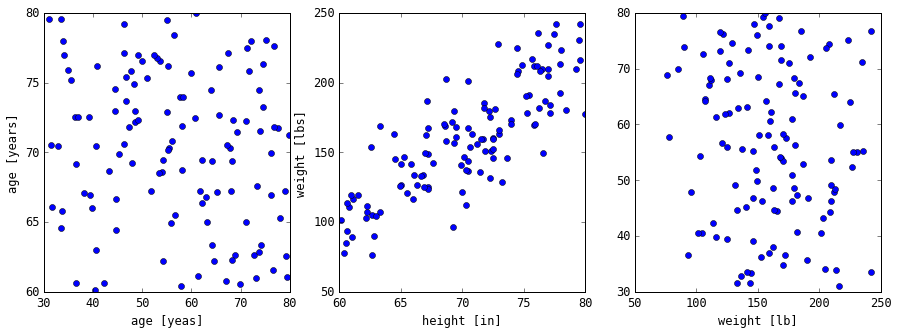

In [1105]:
plotit()

## Important variables (continue) 

- Perform variable selection by trying out a lot of different models, each containing a different subset of the predictors. 

- For example we can use: 
    - null 
    - age
    - height
    - weight
    - age and height
    - height and weight
    - weight and age
    - height and weight and age 
 


** Select **  the best model out of all 

HOW ???? 

Statistics to the rescue: 
- Mallow’s Cp
- Akaike information criterion (AIC)
- Bayesian information criterion (BIC)
- Adjusted $R^2$
<br>
NOTE: WE WILL DISCUSS THESE LATER AND WE SHOW HOW TO USE THEM WITH SKLEANR IN LAB

when p$\rightarrow$ large there are too many model combinations so it becomes intractable 

There are three classical approaches for this task:



#### Forward selection
 - Start with the null model (just $\beta_0$).  
 - Fit p simple linear regressions and add to the null model the variable that results in the lowest RSS
 - Try all two-variable model and add  the variable that results in the lowest RSS
 - Continue until some stopping rule is satisfied (change in RSS is lower than a threshold) 

#### Backward selection
 - Start with all variables in the model
 - Remove the variable with the largest p-value
 - Fit the (p − 1)-variable model and remove the variable with largest p-value
 - Continue until some stopping rule is satisfied (all remaining variables have low p-value) 


#### Mixed selection
 - Start with the null model (just $\beta_0$)
 - Fit p simple linear regressions and add to the null model the variable that results in the lowest RSS 
 - If any variable has low p-value we remove it 
 - Continue until some stopping rule is satisfied (until all variables have low p-value) 
 


 <br>
# Outline 

- Review of last lecture
-  Multiple Regression  
    - Estimating the regression coefficients
    - Relationship Between the Response and Predictors: F-statistics 
    - Important Variables: Information Criteria
    - ** Model Fit ** 
    - Prediction 
- Extensions of the Linear Model
    - Interaction Terms 

    


## Model Fit

As with the simple regression, $R^2$ and RSE are the most common numerical measures to evaluate the goodness of fit.




$$RSE = \sqrt{ \frac{RSS}{n-1-p}} $$

$$RSS  = \sum_i ( y_i - \hat{y_i} )^2 = \sum_i \,e_i^2$$  
 
$$TSS = \sum_i ( y_i - \bar{y_i} )^2  $$

$$ R^2 = 1-\frac{RSS}{TSS} $$



## Model fit 

|     |     age     |  height |  weight | weight+age |age+height | height+weight |age+weight +height|
|----------|:-------------:|:------:|:------: | :------: | :------: | :------: | :------: | 
| $R^2$ |  0.4951 | 0.0764 |  0.11840 |  0.11842 | 0.56212| 0.61336 | 0.61458 |
| RSE |   12.0612   |  16.315 |   15.93917  | 15.93903 | 11.2857048  |  10.59641  |   10.63217     |   


Observation:
- The RSE goes up when "weight+age" $\rightarrow$ "age+weight +height"
- $R^2$ goes up when "weight+age" $\rightarrow$ "age+weight +height"


 <br>
# Outline 

- Review of last lecture
-  Multiple Regression  
    - Estimating the regression coefficients
    - Relationship Between the Response and Predictors: F-statistics 
    - Important Variables: Information Criteria
    - Model Fit 
    - ** Prediction ** 
- Extensions of the Linear Model
    - Interaction Terms 

    


## Prediction 

As with the simple linear regression we have two types of errors

$$ \hat{Y} = \hat{\beta}_0+\hat{\beta}_1 \, X_1+ \hat{\beta}_2 \, X_2 + \ldots + \hat{\beta}_p \, X_p + \epsilon$$ 

but the real data are produced by (assume linear model) 

$$ f(X) = \beta_0+\beta_1 \, x_1+ \beta_2 \, x_2 + \ldots + \beta_p \, x_p $$ 




##### Prediction (cont)


- Linear model is always an approximation.  This source of potentially ** reducible**  is called model bias
- Even if we knew f(X) perfectly we will still never predict the response perfectly due to $\epsilon$ noise. This is ** irreducible error ** and there is nothing we can do about it

We use prediction intervals to deal with this.  Prediction intervals are always larger than the confidence intervals that can be estimated using the SE of the coefficients because they incorprate both the reducible and irreducile error. 

In our example: we  predict the blood pressure of an individua who is <br>
    70in tall, 180lb and 45 years old to be $\rightarrow$ 118.26 and the 95% predictor intervals to be [98, 137]:


In [1108]:

from statsmodels.sandbox.regression.predstd import wls_prediction_std

Xs = np.array( [1, 45, 180, 70])
Q=ols_result.predict(Xs)

sdev, lower, upper = wls_prediction_std(ols_result, exog=Xs, alpha=0.05)
print(lower, upper, Q)

[ 98.84895723] [ 137.68086145] [ 118.26490934]


 <br>
# Outline 

- Review of last lecture
-  Multiple Regression  
    - Estimating the regression coefficients
    - Relationship Between the Response and Predictors: F-statistics 
    - Important Variables: Information Criteria
    - Model Fit 
    - Prediction  
- Extensions of the Linear Model
    - ** Interaction Terms ** 

## Interaction terms (moving away from linearity)

Rynergy effect 

$$ Y = \beta_0 + \beta_1 \times {\rm age} +  \beta_2 \times {\rm height} +  \beta_3 \times {\rm weight} $$

$$ Y = \beta_0 + \beta_1 \times {\rm age} +  \beta_2 \times {\rm height} +  \beta_3 \times {\rm weight} + \\ \beta_4 \times ({\rm weight} \times {\rm height}) $$

In [1109]:
Xt = np.vstack([age, weight, height, height*weight,  age*weight, height*weight, age*height*weight]).T
#Xt = np.vstack([age, weight, height, height*weight]).T
X = sm.add_constant(Xt)
ols = sm.OLS(  blood, X)
ols_result = ols.fit()
print("R^2=",ols_result.rsquared)
print("RSE=", np.sqrt(np.sum(ols_result.resid**2)/(np.size(age)-1-Xt.shape[1])))
ols_result.summary()

R^2= 0.678425110592
RSE= 9.81096402391


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.678
Model:                            OLS   Adj. R-squared:                  0.661
Method:                 Least Squares   F-statistic:                     39.73
Date:                Mon, 19 Sep 2016   Prob (F-statistic):           1.14e-25
Time:                        12:45:39   Log-Likelihood:                -440.15
No. Observations:                 120   AIC:                             894.3
Df Residuals:                     113   BIC:                             913.8
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         66.0076     55.970      1.179      0.241       -44.880   176.895
x1             0.6059      0.455      1.333      0.185        -0.295     1.507
x2            -0.2570      0.716     -0.359      0.720        -1.676     1.162
x3             0.0656      0.691      0.095      0.924        -1.303     1.434
x4             0.0019      0.004      0.456      0.649        -0.006     0.010
x5             0.0101      0.011      0.909      0.365        -0.012     0.032
x6             0.0019      0.004      0.456      0.649        -0.006     0.010
x7            -0.0001      0.000     -0.904      0.368        -0.000     0.000
==============================================================================
Omnibus:                        1.032   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.597   Jarque-Bera (JB):                0.983
Skew:                          -0.217   Prob(JB):                        0.612
Kurtosis:                       2.908   Cond. No.                     7.53e+19
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 9.9e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [1110]:
#  IMPORT DAYA 
data = pd.read_csv('bloodpressure.csv')
age=data['age'].values
weight=data['weight'].values
height=data['height'].values
gender = data['gender'].values
blood=data['bloodpressure'].values


In [1111]:
Xt = np.vstack([age, weight, height, gender, height*weight,  age*weight, height*weight, age*height*weight]).T
#Xt = np.vstack([age, weight, height, height*weight]).T
X = sm.add_constant(Xt)
ols = sm.OLS(  blood, X)
ols_result = ols.fit()
print("R^2=",ols_result.rsquared)
print("RSE=", np.sqrt(np.sum(ols_result.resid**2)/(np.size(age)-1-Xt.shape[1])))
ols_result.summary()

R^2= 0.691629854093
RSE= 9.31540174625


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.692
Model:                            OLS   Adj. R-squared:                  0.672
Method:                 Least Squares   F-statistic:                     35.89
Date:                Mon, 19 Sep 2016   Prob (F-statistic):           7.56e-26
Time:                        12:45:39   Log-Likelihood:                -433.40
No. Observations:                 120   AIC:                             882.8
Df Residuals:                     112   BIC:                             905.1
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const       -156.2842     57.935     -2.698      0.008      -271.076   -41.493
x1             2.4628      0.438      5.623      0.000         1.595     3.331
x2             2.6551      0.605      4.386      0.000         1.456     3.854
x3             1.7584      0.730      2.409      0.018         0.312     3.205
x4            -3.6103      1.734     -2.082      0.040        -7.045    -0.175
x5            -0.0139      0.003     -4.017      0.000        -0.021    -0.007
x6            -0.0302      0.009     -3.376      0.001        -0.048    -0.012
x7            -0.0139      0.003     -4.017      0.000        -0.021    -0.007
x8             0.0003   9.64e-05      2.992      0.003      9.74e-05     0.000
==============================================================================
Omnibus:                        0.776   Durbin-Watson:                   1.883
Prob(Omnibus):                  0.678   Jarque-Bera (JB):                0.558
Skew:                          -0.165   Prob(JB):                        0.757
Kurtosis:                       3.053   Cond. No.                     1.12e+19
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.3e-25. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""